# Introduction to Deep Learning

Artificial Intelligence(AI) can be defined as the process of automating the task which are normally performed by humans.As shown in figure 1.1 , Machine Learning(ML) and Deep Learning(DL) are the subset of AI. DL is the subset of the Machine learning which is used to solve the practical tasks in variety of fields such as in computer vision ,natural language processing and automatic speech recognition.Deep Learning uses the methods that are available in Machine Learning whose algorithm are based on how human brain works. 
The brain is the organ which dictates the way we perceive the signal from our sensory organs such as sight,sound,smell,taste and touch. Based on the signal we are able to make some actions. We have been dreaming of building an intelligent machines which works like our brain.Our brain can take sensory signal as an input and make a decision in matter of microseconds. However an Artificially intelligent machines requires us to solve some of the most complex computational problem. Deep Learning helps us to solve this problem by programming a computer in a different way using the traditional techniques. 

![figure1_1.png](images/figure1_1.png)

# Neuron

A neuron or the nerve cell  is the basic building blocks of the nervous system(Figure 1.2). A neuron is optimized to receive and process information from other neurons and send the result to other cells. The neuron receives its inputs along the root like structure called dendrites. Each dendrites of the neurons are indirectly connected to other neuron at the axon terminal by leaving a small spaces called synapses. Each of these signal received by dendrites are dynamically strengthed or weakened based upon how often it is use.Each of these inputs are weighted based upon strength and summed together and transformed into a new signal which is propagates through cell axon and transmitted to other neurons through synapses.  

![figure1_2.png](images/figure1_2.png)

# Multilayer Perceptron (MLP)

Multilayer perceptron is a  fully connected class of feedforward artificial network. A feed forward network is an Artficial Neural network where the connections between the nodes do not form any cycle. It is one of the simplest network having one input layer , one output layer and few hidden layers. Each layer has multiple neurons and the adjacent layers are fully connected. Weighted signals from the previous layer are push towards neuron located at next layer.The weighted signals are summed up at each neurons and bias is added to sum of products at each neurons. An activation function maps this weighted sum of product(SOP) so as to decide whether or not this SOP needs to be considered. This results an ouput signals for the next level. 

![figure1_3.png](images/figure1_3.png)

An input layer consists of raw data or preprocessed data. For example , images as an input would be the raw pixel values or for a text data it could be the word or characters.

An output layer is the output value of the network and depends upon the type of problem we are dealing with. For example for a classification problems, the output layer can have $n$ neurons for n number of classes and uses softmax function to output the probability of being in each class.For regression problem , network can have 1 ouput so as to predict a single quantity. Figure1.3 depicts a fully connected neural network with two hidden layers , 3 inputs and 1 output.

## Activation Function

An activation function in each artificial neuron present at each layers decides whether the incoming signals have reached the threshold and should output signals for the next level.A neural network has different activation functions as shown in the matplot's plot below.An activation function maps received weighted values sum (SOP) in a non linear way . For example, the activation function(ReLU) can release a 0 value unless the input achieves a certain threshold or (Leaky-Relu) it can dampen a value by some scaling factor until a threshold is achieved.
Neural Networks commonly uses sigmoid ,hyperbolic tangent(TanH) or the Relu().A good activation functions are non linear, i.e they turn at some point. Sigmoid function(see plot below) squishes the infinite amount of input to an output between 0 and 1.Tanh is same as sigmoid except it maps everthing in between -1 and 1.  
Take a look at some of the activation function below and try to think what kind of function reLU and Leaky-reLu are ?

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
class activation_fun():
    def __init__(self,x):
        self.x=x
    
    def sigmoid(self):
        return 1/(1+np.exp(-1*self.x))
    
    def tanh(self):
        return np.divide ((np.exp(self.x)-np.exp(-1*self.x)), (np.exp(self.x)+np.exp(-1*self.x)))
    
    def relu(self):
        return [ 0 if ele<0 else ele for ele in self.x ] 
    
    def leaky_relu(self):
        return [ 0.15*ele if ele<0 else ele for ele in self.x ]

In [ ]:
active_func=activation_fun(np.arange(-6,6,0.5))

In [ ]:
func_methods=[(lambda m: m.sigmoid()),(lambda m:m.tanh()),(lambda m:m.relu()),(lambda m:m.leaky_relu())]
func_title=['sigmoid','tanh','relu','leaky_relu']

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(10,8),facecolor='w',edgecolor='k')
for i, (ttl,f,ax) in enumerate(zip(func_title,func_methods,axs.ravel())):
    ax.plot(np.arange(-6,6,0.5),f(active_func))
    ax.set_title(ttl)

## How A Network Learns ? Forward Propagation and Backward Propagation

Figure 1.4 shown below is a computational graph representation for a neural network represented in figure 1.3. We are going to present the both operation forward and backward propagation based on that model. Let us assume the sigmoid function ($\sigma$ ) as our activation function. 
When the network is configured, training of the network starts with some randomized weights. The weights can be propely initialized as well so that the coefficients can best capture the data patterns.


![figure1_4.png](images/figure1_4.png)

In the figure above $X$ is the input vector of order of length $M = 3$(or could be a Matrix of order $N \times  M$ where $N$ is the total number of samples).$W_1$ and $W_2$ is the weight matrix and $b_1$ and $b_2$ is the bias vector at layer 1  and layer 2 respectively . An activation function maps input $h_1$ and outs $h_2$. $\hat{y}$ is the predicted output and $t$ is the true target values.  

### Forward Propagation

Forward propagation is the process of calculating the input data multiplied by the networks weight plus added bias. This sum of products with added bias are then mapped with some activation function. This process of generating output is also a part of prediction mapping which is carrried out by a prediction map $h(x)$ such that predicted output is $\hat y=h(x) $. A linear predictor map has the form of $h(x)=w^Tx=\sum_{i=1}^d w_ix_i $ . In the example below, we may consider the output of the matrix multiplication between input and weight is the output of the prediction Map. 

Let us recall linear algebra for two matrix multiplication. In order to multiply two matrices $A$ and $B$, the number of columns in first matrix $A$ must be equal to the number of rows in 2nd matrix $B$.  The resultant matix order will be the number of rows in 1st matrix $A$ and number of columns in 2nd matrix.Let us calculate the size of the Input matrix, output matrix at all layers and all the intermediate weights.


- $X$ is of order $1 \times 3 $ .For simplicity,assume $X$ consists of a 1 sample. If there are N samples then order will be of $N\times3 $
- $W_1$ is of order $3\times4$ -- We have 4 neurons in layer 1 and the size of input is 3 . 

Therefore 
$$ order-of-weight= $length-of-input \times  number-of-neurons$$

- $h_1$ is the matrix multiplication result between $X$.$W_1$ and after adding bias $b_1$ () . The resultant matrix size ($X$.$W_1$) would be($1\times4$)and therfore the bias vector size should be ($1\times4$).

- $h_2$ is the output of activation function(sigmoid).$h_2=\sigma(h_1)$.

- $h_2$ is the order of ($1\times4$) which is the input for layer 2. the number of input =4  and number of neurons in layer 2 =4 . Therfore order of weight $W_2=4\times4$ and the resultant output is $1\times4$. This would be added with the bias size of $1\times4$.

- At the output layer we have 1 output $\hat{y}$ and the input size is  $1\times4$ so the order of weight matrix should be 
  $4\times1$. The order of output matrix which is $\hat{y}$ would be scalar consisting of only one element. Similary the bias size would be 1.
  
- (parameter that a network learns during training)No. of trainable parameters = sum of all the elements present in the each weight matrix + length of each biases
                              =( total elements in  $W_1$ + total elements in  $W_2$ + total elements in weight matrix at output layer + length of bias $b_1$  + length of bias $b_2$+ length of bias at output layer )
                              =  12+16+4+4+4+1 = 41



### Backward Propagation

Neural network learns from the error and updates the network weight or the parameters based on a given cost function. For the computational graph in Figure 1.4 , we take Mean Square Error  as our cost function(loss function).Mean square loss is defined as 
$$c=\frac{1}{N}\sum_{i=1}^N (y_i - t_i)^2 $$
If we assume there are $N$ samples in  $X$ consisting of 3 features(length of $X$), we calculate average MSE. Therefore we have extra term $\frac{1}{N}$.$i$ represents the index for the each sample processed. For example $i=0$ corresponds to the 0th sample, $i=1$ corresponds to the 1st sample and so on .$y_i$ and $t_i$is the predicted output and target value of the corresponding $i^{\text{th}}$ input sample in $X$  

Let us consider a composite function $F(x) =f(g(x))$ also written as  $F(x)=f \circ g$ . The derivative of function $F(x)$ can be calculated using popular chain-rule method and can be written as 
$$F'(x)=f'(g(x))g'(x)$$
The symbol <b>'</b> indicates the first order derivative of the function. 

![figure1_5.png](images/figure1_5.png)

Consider a Multi layer perceptron consisting . The target is to find the gradient of loss with respect to each learnable parameters in the neural network. For the computational graph shown in figure 1.5 ,we can define 
$$ h= f_1(X,W) +b_1 $$
$$ y= f_2(h,\theta) +b_2 $$
$$f_1(X,W)=X.W $$
$$f_2(h,\theta)=h.\theta $$

For a cost function such as MSE in equation(2) , we can write the gradient of loss function with respect to(wrt) output $y$ 
$$\frac{\partial }{\partial y} = \frac{2*(y_i-t_i)}{N} $$
The gradient of loss wrt to input parameter $\theta$ is given by (Using chain rule)
$$\frac{\partial ℒ}{\partial \theta} =\frac{\partial ℒ}{\partial y} \frac{\partial y}{\partial \theta}  $$
The gradient of loss wrt to input parameter $w$ is given by (using chain rule )
$$\frac{\partial ℒ}{\partial w} =\frac{\partial ℒ}{\partial y} \frac{\partial y}{\partial h} \frac{\partial h}{\partial w}  $$

The partial derivative $\frac{\partial y}{\partial h}$ ,$\frac{\partial h}{\partial w}$ and $\frac{\partial y}{\partial \theta}$ can be easily calculated using equation 4,5 ,6 and 7. The reason it is called back propagation is because we are able to represent our gradient of loss wrt to all the trainabale parameters in terms of partial derivative of output wrt to input at every intermediate layers. We calculate each partial derivative starting from the back(ouput) and move towards starting point (input) as shown in figure 1.5. 

# Mean Squared Error (MSE):LOSS FUNCTION 

Mean square Error(in equation(2)) is one of the most used loss function for machine learning.The squared loss is defined as 
$$ ℒ(y,\hat{y}) =   (y-\hat{y})^2 $$ 
where $y$ and $\hat{y}$ is the target and predicted target values respectively.
The average of this square loss is termed as MSE can be written as 
$$ f(w) = \frac{1}{n} [(y_0-\hat{y_0})^2 + (y_1-\hat{y_1})^2 + ........................+ (y_n-\hat{y_n})^2]  $$
The loss function $f(w)$ is the function of weight $w$ which measures the loss ooccured by prediction of target label $\hat y$ and true target label $y$.By choosing the linear predictor with MSE  results in a loss function which has convex shape. The convex function are differentiable and the local minima for a convex function is always a global minima.
In case a predictor has non linear dependencies on weights, we would have non convex shape of MSE.So our algorithm might stuck in local minima which is not a global minima.

# Gradient Descent (GD) and Stochastic Gradient Descent(SGD): An Optimization Algorithm 

Optimization is the process how a network learns.Learning is an optimization process which minimizes the error ,cost or finds the locus of the least errors. It then adjusts or updates  the network coefficient.Gradient Descent is one of the optimization algorithms which  performs a prediction and weight update by running through all the samples in the training dataset for a single weight  update. Our gradient descent moves towards the negative direction of gradient of loss function $\nabla f(w)$.
Gradient Descent finds the sequence of weight vectors such that the loss values tends towards minimum. For this purpose an initial guess would be made for the weights which changes iteratively so that our loss values converges towards zero.  
The weight update algorithm given the gradient of loss function moving with step $\epsilon $ is given as:

$$W_{t+1}=W_{t}-\epsilon \nabla f(w)_{t} $$

The next weight(updated weight) $W_{t+1}$ depends upon the current weight $W_{t}$ ,$\epsilon$, and current gradient of loss function $\nabla f(w)_{t}$. Here epsilon is the step size which actually controls how quicker do you want to move towards the minima of loss function . Moving too fast may result in the skip of minima or moving too slow may result in larger time to reach to convergence.Now let's look at the equation (10) of backward propagation. The backward propagation calculates the gradient at each layer and the new weights are updated using equation (13). Figure(1.6), shows the overall process of Deep Learning work flow.  

GD has a disadvantage specially when we have large sets of data because we have to wait for huge amount of time just to make a single update to the current weight. In order to avoid this computational complexity , Stochastic Gardient Descent(SGD) uses small subset known as batch as a training datset. 

Full Gradient Descent is another improvisation to SGD where the network calculates the average weight over the entire dataset, changing the weights only each time it computes a full average. 

Batch Gradient Descent in other hand selects the sample randomly of size typically ranging from 8 to 256  and the weights are updated for each batch. This technique makes optimization fast.

![figure1_6.png](images/figure1_6.png)

# MLP for Training MNIST dataset 

In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.datasets  import mnist
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [ ]:
print(f'The shape of x_train is :{x_train.shape}') ## train data
print(f'The shape of x_test is :{x_test.shape}') ## test data 
print(f'The shape of y_train is :{y_train.shape}') ##  train labels 
print(f'The shape of y_test is :{y_test.shape}')## test labels 



In [ ]:
len_of_class = len(np.unique(y_train))
print(len_of_class)

In [ ]:
fig,axs=plt.subplots(2,5,figsize=(10,8),facecolor='w',edgecolor='k')
for image,label, ax in zip(x_train,y_train,axs.ravel()):
    ax.imshow(image)
    ax.set_title(f'The number is {label}')
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
model = Sequential([
                   layers.Rescaling(1./255, input_shape=(28,28,1)),  # rescaling normalizes the pixel value between 0 and 1. Th
                                                                    # Maximum pixel size being 255 
                   layers.Flatten(), # Flattening changes tensor to 1D array
                   layers.Dense(256,activation='relu'), # first layer of MLP consists of 256 neurons
                   layers.Dense(128,activation='relu'), # second layer consists of 128 neurons
                   layers.Dense(len_of_class) # last layer should consists of number of neurons=number of classes
                   ])


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=10)

In [ ]:
## Test Your Model with the Test Data set

In [ ]:
fig,axs=plt.subplots(3,2,figsize=(10,8))
for image_test,label_test, ax in zip(x_test,y_test,axs.ravel()):
    y_pred=np.argmax(model.predict(image_test.reshape(1,-1))) # returns the position for given maximum probability 
                                                              # reshape(1,-1) is similar to flattening , flatten a tensor to an 
                                                              # array of 1 row and N columns.
                                                              # use model.predict to get predicted labels value for given test image
    ax.imshow(image_test)
    ax.set_title(f'actual image:{label_test}, predicted image :{y_pred}')
    ax.set_xticks([])
    ax.set_yticks([])


# Exercise for Students

In this exercise, students are going to build a MLP model on a dummy dataset . Some of the parts in the code has been already done, students are suppose to fill up the remaining scripts according to some instructions. You may refer to the code provided in the example. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [3]:
# let us create a dummy dataset 
X=np.random.randn(100,1)
y=np.sin(X*2*np.pi/3)
# let us add some noise to the target 
y_hat=y+0.2*np.random.randn(y.shape[0]).reshape(y.shape[0],1)



In [4]:
df=pd.DataFrame(np.c_[X.reshape(-1,),y_hat.reshape(-1,)], columns=['X','y_hat'])

In [79]:
df

,X,y_hat
0,0.303765,0.968790
1,-0.381042,-0.776168
2,-0.376401,-1.073799
3,0.294470,0.426786
4,-1.333954,-0.401633
...,...,...
95,-0.359093,-0.565931
96,1.546444,-0.434908
97,-0.305958,-0.809907
98,1.294179,0.345610


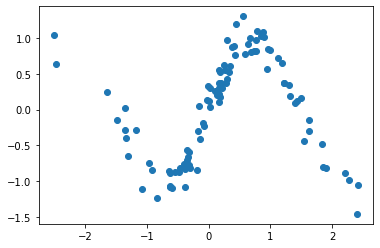

In [5]:
plt.scatter(X,y_hat)

In [98]:
## TO DO 
## USE train_test_split to split data set (X and y_hat) in train ,val_test (train=80% and test=20%)
## again use val_test  data and split into 90% val and 10% test
## YOUR CODE HERE
## use train_test_split from sklearn and X=df.X and y=df.y

X_train,X_val,y_train,y_val=train_test_split(df.values[:,0],df.values[:,1],test_size=0.2,random_state=42)


In [82]:
print(f'The shape of X_train is :{X_train.shape}') ## train data
print(f'The shape of X_val is :{X_val.shape}') ## validation data 
print(f'The shape of y_train is :{y_train.shape}') ##  validation labels 
print(f'The shape of y_val is :{y_val.shape}')## test labels 


The shape of X_train is :(80,)
The shape of X_val is :(18,)
The shape of y_train is :(80,)
The shape of y_val is :(18,)
The shape of X_test is :(2,)
The shape of y_test is :(2,)


BUILD A MODEL WITH GIVEN SPECIFICATION
Layers               Neurons              Activation Function 
Dense Layer-I        10                   Relu
Dense Layer-II       11                   Relu 
Dense Layer-III       1                     -
<table>
  <thead>
    <tr>
      <th>Layers</th>
      <th>Neurons</th>
      <th>Activation Function</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Dense Layer-I</td>
      <td>10</td>
      <td>ReLU</td>
    </tr>
    <tr>
     <td>Dense Layer-II</td>
      <td>11</td>
      <td>ReLU</td>
    </tr>
    <tr>
     <td>Dense Layer-II</td>
      <td>1</td>
      <td>-</td>
    </tr> 
  </tbody>
</table>

In [83]:
# Refer https://keras.io/api/
model=tf.keras.models.Sequential()
## TO DO 
## YOUR CODE HERE
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dense(1))  # remember number of neurons in last layer is 
                                                        # equal to number of output variable that is 1


In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_25 (Dense)             (None, 11)                121       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 12        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [91]:
##TO DO 
## Use optimizer 'adam' and loss as 'mean_squared_error'
# YOu may use metrics as  tf.keras.metrics.MeanSquaredError()
##YOUR CODE HERE 
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics=tf.keras.metrics.MeanSquaredError(),
              loss='mean_squared_error')

In [97]:
epochs=300
## USe epoch=10,and fit your model in here 
# Report your accuracy in Quiz
model.fit(x=X_train,y=y_train,batch_size=1,validation_data=(X_val,y_val),epochs=epochs)

Epoch 1/300
80/80 [==============================] - 0s 937us/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 2/300
80/80 [==============================] - 0s 709us/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 3/300
80/80 [==============================] - 0s 709us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 4/300
80/80 [==============================] - 0s 722us/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5/300
80/80 [==============================] - 0s 709us/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 6/300
80/80 [==============================] - 0s 721us/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 7/300
80/80 [===

80/80 [==============================] - 0s 747us/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 52/300
80/80 [==============================] - 0s 848us/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 53/300
80/80 [==============================] - 0s 785us/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 54/300
80/80 [==============================] - 0s 734us/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0674 - val_mean_squared_error: 0.0674
Epoch 55/300
80/80 [==============================] - 0s 760us/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 56/300
80/80 [==============================] - 0s 722us/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 57/300
80/80 [=========

80/80 [==============================] - 0s 776us/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 102/300
80/80 [==============================] - 0s 705us/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 103/300
80/80 [==============================] - 0s 810us/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 104/300
80/80 [==============================] - 0s 699us/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 105/300
80/80 [==============================] - 0s 712us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 106/300
80/80 [==============================] - 0s 721us/step - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 107/300
80/80 [===

Epoch 151/300
80/80 [==============================] - 0s 744us/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 152/300
80/80 [==============================] - 0s 687us/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 153/300
80/80 [==============================] - 0s 851us/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 154/300
80/80 [==============================] - 0s 822us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 155/300
80/80 [==============================] - 0s 751us/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 156/300
80/80 [==============================] - 0s 749us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 157/

Epoch 201/300
80/80 [==============================] - 0s 760us/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 202/300
80/80 [==============================] - 0s 701us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 203/300
80/80 [==============================] - 0s 717us/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 204/300
80/80 [==============================] - 0s 721us/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 205/300
80/80 [==============================] - 0s 699us/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 206/300
80/80 [==============================] - 0s 711us/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 207/

Epoch 251/300
80/80 [==============================] - 0s 721us/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 252/300
80/80 [==============================] - 0s 722us/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 253/300
80/80 [==============================] - 0s 747us/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 254/300
80/80 [==============================] - 0s 709us/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 255/300
80/80 [==============================] - 0s 696us/step - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 256/300
80/80 [==============================] - 0s 709us/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 257/

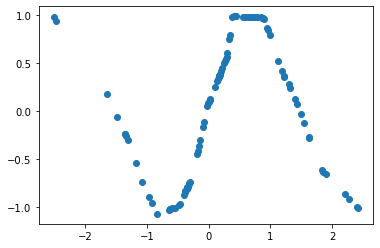

In [99]:
## Make prediction for X 
## YOUR CODE HERE
plt.scatter(X,model.predict(X))